In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [1]:
#downcast for less memory usage 
cols_int16={
    'item_id': 'category',
    'dept_id': 'category',
    'cat_id': 'category',
    'store_id': 'category',
    'state_id': 'category',
    'sales': 'int16',
    'month': 'int8',
    'year': 'int16',
    'd': 'int16',
    'event_name_1': 'category',
    'event_type_1': 'category',
    'event_name_2': 'category',
    'event_type_2': 'category',
    'snap_CA': 'int8',
    'snap_TX': 'int8',
    'snap_WI': 'int8',
    'day': 'int8',
    'sell_price':'float32',
    'sales_lag1':'int16',
    'sales_lag2':'int16',
    'sales_lag3':'int16',
    'sales_lag4':'int16',
    'sales_lag5':'int16',
    'sales_lag6':'int16',
    'sales_lag7':'int16',
    'sales_lag14':'int16',
    'sales_lag21':'int16',
    'sales_lag28':'int16',
    'sales_lag35':'int16',
    'sales_lag30':'int16',
    'sales_lag31':'int16',
    'sales_lag60':'int16'
    }

df=pd.read_csv('modeling.csv',dtype=cols_int16)

NameError: name 'pd' is not defined

In [ ]:
import numpy as np 

df['iteam_sales_avg'] = df.groupby('item_id')['sales'].transform('mean').astype(np.float16)
df['state_sales_avg'] = df.groupby('state_id')['sales'].transform('mean').astype(np.float16)
df['store_sales_avg'] = df.groupby('store_id')['sales'].transform('mean').astype(np.float16)
df['cat_sales_avg'] = df.groupby('cat_id')['sales'].transform('mean').astype(np.float16)
df['dept_sales_avg'] = df.groupby('dept_id')['sales'].transform('mean').astype(np.float16)
df['cat_dept_sales_avg'] = df.groupby(['cat_id','dept_id'])['sales'].transform('mean').astype(np.float16)
df['store_item_sales_avg'] = df.groupby(['store_id','item_id'])['sales'].transform('mean').astype(np.float16)
df['cat_item_sales_avg'] = df.groupby(['cat_id','item_id'])['sales'].transform('mean').astype(np.float16)
df['dept_item_sales_avg'] = df.groupby(['dept_id','item_id'])['sales'].transform('mean').astype(np.float16)
df['state_store_sales_avg'] = df.groupby(['state_id','store_id'])['sales'].transform('mean').astype(np.float16)
df['state_store_cat_sales_avg'] = df.groupby(['state_id','store_id','cat_id'])['sales'].transform('mean').astype(np.float16)
df['store_cat_dept_sales_avg'] = df.groupby(['store_id','cat_id','dept_id'])['sales'].transform('mean').astype(np.float16)

In [ ]:
df['rolling_sold_mean'] = df.groupby(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sales'].transform(lambda x: x.rolling(window=7).mean()).astype(np.float16)

In [ ]:
df['expanding_sold_mean'] = df.groupby(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sales'].transform(lambda x: x.expanding(2).mean()).astype(np.float16)

In [ ]:
df.id.head()

0    14370
1    14380
2    14390
3    14400
4    14410
Name: id, dtype: int16

In [ ]:
'''we decoded the data for minimum memory usage and because 
i thought i'll be using an LSTM+embedding (which is very resource intensive)
now i'm decoding it back into categories because i'll be using catboost 
'''

import pickle as pkl 

with open('calendar_encoders.pkl','rb') as f : 
    le1=pkl.load(f)

with open('validation_le_encoders.pkl','rb') as f : 
    le2=pkl.load(f)
le=le1|le2

In [ ]:
print(le)

{'event_name_1': LabelEncoder(), 'event_type_1': LabelEncoder(), 'event_name_2': LabelEncoder(), 'event_type_2': LabelEncoder(), 'id': LabelEncoder(), 'item_id': LabelEncoder(), 'dept_id': LabelEncoder(), 'cat_id': LabelEncoder(), 'store_id': LabelEncoder(), 'state_id': LabelEncoder()}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int16  
 1   item_id       int16  
 2   dept_id       int8   
 3   cat_id        int8   
 4   store_id      int8   
 5   state_id      int8   
 6   wm_yr_wk      int16  
 7   day           int8   
 8   month         int8   
 9   year          int16  
 10  d             int16  
 11  event_name_1  int8   
 12  event_type_1  int8   
 13  event_name_2  int8   
 14  event_type_2  int8   
 15  snap_CA       int8   
 16  snap_TX       int8   
 17  snap_WI       int8   
 18  weekday_cos   float64
 19  weekday_sin   float64
 20  sales         int16  
 21  sell_price    float32
dtypes: float32(1), float64(2), int16(6), int8(13)
memory usage: 2.4 GB


In [ ]:

for col in le : 
    df[col]=pd.Series(le[col].inverse_transform(df[col])).astype('category')


In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,day,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekday_cos,weekday_sin,sales,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,11101,29,1,2011,1,No event,No event,No event,No event,0,0,0,-0.222521,-0.974928,0,9.58
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,11101,29,1,2011,1,No event,No event,No event,No event,0,0,0,-0.222521,-0.974928,0,3.97
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,11101,29,1,2011,1,No event,No event,No event,No event,0,0,0,-0.222521,-0.974928,0,2.97
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,11101,29,1,2011,1,No event,No event,No event,No event,0,0,0,-0.222521,-0.974928,0,4.34
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,11101,29,1,2011,1,No event,No event,No event,No event,0,0,0,-0.222521,-0.974928,0,2.98


In [ ]:
import gc 
gc.collect()

0

<Figure size 1200x600 with 0 Axes>

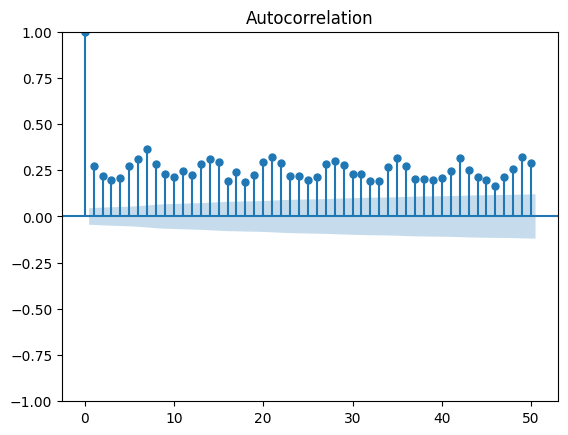

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


sales_series = df[df['store_id']=='TX_2']
sales_series = sales_series[sales_series['item_id']=='HOBBIES_1_004']['sales']

# Now sales_series is a Series over time
plt.figure(figsize=(12,6))
plot_acf(sales_series, lags=50)
plt.show()


In [ ]:
'''in order to use gradient boosters for forecasting here we need to transform time series data 
to supervised data , so we need to add past data of time sensetive features that have impact on the sales (A.K.A lag)'''

lag=[1,2,3,4,5,6,7,14,21,28,35,30,31,60] 

for l in lag : 
    df[f'sales_lag{l}']=df.groupby(['store_id','item_id'])['sales'].shift(l).fillna(0).astype('int16')

/tmp/ipykernel_938433/2632388522.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[f'sales_lag{l}']=df.groupby(['store_id','item_id'])['sales'].shift(l).fillna(0).astype('int16')
/tmp/ipykernel_938433/2632388522.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[f'sales_lag{l}']=df.groupby(['store_id','item_id'])['sales'].shift(l).fillna(0).astype('int16')
/tmp/ipykernel_938433/2632388522.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

In [ ]:
df.to_csv('modeling.csv',header=True,index=False)

In [ ]:
df.drop(['wm_yr_wk','id'],axis=1,inplace=True)

In [3]:
df=pd.read_pickle('../test/data.pkl')

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.head()

,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,revenue,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_6,sold_lag_12,sold_lag_24,sold_lag_36,iteam_sold_avg,state_sold_avg,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
1067150,1437,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.216553,1.21582,1.304688,0.561035,0.695801,0.695801,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,0.0,0.0,-0.321533
1067151,1438,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.259766,1.21582,1.304688,0.561035,0.695801,0.695801,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,0.0,0.0,-0.253906
1067152,1439,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.076660,1.21582,1.304688,0.561035,0.695801,0.695801,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,0.0,0.0,-0.156982
1067153,1440,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,4.339844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.011719,1.21582,1.304688,0.561035,0.695801,0.695801,1.694336,2.011719,2.011719,1.304688,0.801758,1.020508,0.0,0.0,-1.694336
1067154,1441,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.755371,1.21582,1.304688,0.561035,0.695801,0.695801,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,0.0,0.0,-0.958984


In [4]:
df['d'].max()

np.int16(1969)

In [7]:
data=df[df['d']<1600]
with open(f'train.pkl','wb') as f :
    pkl.dump(data,f)
del data 

In [6]:
import pickle as pkl 


for i in range(1,6) : 
    data=df[(df['d']>=1600+((i-1)*30)) & (df['d']<=1600+(i*30))]
    with open(f'part{i}.pkl','wb') as f :
        pkl.dump(data,f)
    del data 

data=df[(df['d']>=1600+((6-1)*30)) & (df['d']<=1600+(6*30))]
with open(f'part{6}.pkl','wb') as f :
    pkl.dump(data,f)
del data 

In [ ]:
df.drop('id',inplace=True,axes=1).head()

In [ ]:
from sklearn.metrics import root_mean_squared_error
from lightgbm import LGBMRegressor 
import lightgbm as lgb 
import gc



df_train=df[(df['d']<=1800) & (df['store_id']==3)]
df_vald=df[(df['d']<=1913) & (df['d']>1800)& (df['store_id']==3)]

del df  
gc.collect()

y_train,y_vald=df_train['sold'],df_vald['sold']
df_train.drop('sold',inplace=True,axis=1)
df_vald.drop('sold',inplace=True,axis=1)
X_train,X_vald=df_train,df_vald

In [5]:
train=lgb.Dataset(
    X_train,
    y_train,
    free_raw_data=True,
)

valid=lgb.Dataset(
    X_vald,
    y_vald,
    free_raw_data=True ,
    reference=train , 
)

In [ ]:
import pickle as pkl 

dts=[train,valid]
with open('dataset.pkl','wb') as f : 
    pkl.dump(dts,f)

In [ ]:
import pickle as pkl 

with open('dataset.pkl','rb') as f : 
    dts=pkl.load(f)

In [6]:
import pickle as pkl 

with open('all_model.pkl','rb') as f : 
    model=pkl.load(f)

In [ ]:
from sklearn.metrics import root_mean_squared_error
from lightgbm import LGBMRegressor 
import lightgbm as lgb 
import gc

In [6]:
params={
    'objective':'regression',
    'metric':'rmse',
    'device':'cpu',
    'num_leaves':50 , #numbes in the form of 2**n -1 are binary firiendly like 255 , 127 ,511 
    'max_depth':8 , 
    'n_jobs':-1 ,

    'n_estimators':1000,
    'learning_rate':0.3,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'min_child_weight':300


}

model=lgb.train(
    params , 
    train ,
    300 , 
    [train,valid],
    callbacks=[
        lgb.early_stopping(20,verbose=True),
        lgb.log_evaluation(1)
    ]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.504135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4147
[LightGBM] [Info] Number of data points in the train set: 47686360, number of used features: 43
[LightGBM] [Info] Start training from score 1.097462
[1]	training's rmse: 2.89477	valid_1's rmse: 2.75376
Training until validation scores don't improve for 20 rounds
[2]	training's rmse: 2.15207	valid_1's rmse: 2.03042
[3]	training's rmse: 1.6333	valid_1's rmse: 1.52427
[4]	training's rmse: 1.28839	valid_1's rmse: 1.18491
[5]	training's rmse: 1.07088	valid_1's rmse: 0.973304
[6]	training's rmse: 0.936035	valid_1's rmse: 0.836768
[7]	training's rmse: 0.842528	valid_1's rmse: 0.744076
[8]	training's rmse: 0.792375	valid_1's rmse: 0.694337
[9]	training's rmse: 0.735444	valid_1's rmse: 0.633734
[10]	training's rmse: 0.715749	valid_1's rmse

KeyboardInterrupt: 

In [ ]:
with open('all_model.pkl','wb') as f : 
    pkl.dump(model,f)

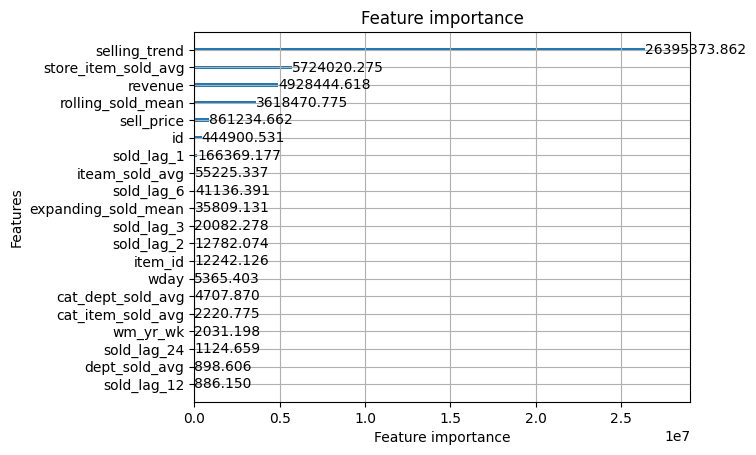

In [7]:
import matplotlib.pyplot as plt
import lightgbm as lgb
lgb.plot_importance(
    model,
    importance_type='gain',   # best choice
    max_num_features=20
)
plt.show()